# Linear Algebra with NumPy 


In this notebook we discuss a bit the basics of numerical Linear Algebra and plotting in python by looking at a few simple physics problems.

## Electrical Circuits

Now, we will look at the analysis of some non-trivial electrical circuits using **Mesh Analysis**. Mesh analysis makes systematic use of **Kirchhoff’s voltage law** (KVL) to arrive at a set of equations that then are solved numerically.

As an example, consider the following circuit diagram.

![Electrical Circuit](images/electrical-network.png "Electrical Circuit")
The objective is, given the values of voltages and resistances in the circuit diagram, find the three mesh currents $I_1, I_2, I_3$. 

We can draw three loops representing three mesh currents $I_1, I_2$ and $I_3$. These are indicated in the diagram.
For each closed loop, we can apply KVL, given by $\sum_k V_k=0$, in conjunction with Ohm's Law, $V=I R$, to give three simultaneous equations:

\begin{align*}
\left(30+20\right) I_1-30 I_3 & =\left(100-20\right), \\
\left(20+20\right) I_2-20 I_3 & =\left(60+20\right), \\
-30 I_1-20 I_2+\left(50+20+30\right) I_3 & =0 .
\end{align*}


These can be expressed in matrix-vector form as $\mathbf{R}\cdot\vert I\rangle=\vert{V}\rangle$ :

\begin{equation*}
\begin{pmatrix}
50 & 0 & -30 \\
0 & 40 & -20 \\
-30 & -20 & 100
\end{pmatrix}\begin{pmatrix}
I_1 \\
I_2 \\
I_3
\end{pmatrix}=\begin{pmatrix}
80 \\
80 \\
0
\end{pmatrix},
\end{equation*}

We already know how to create $\mathbf{R}$ matrix and $\vert V \rangle$ vector using `numpy.array()`. Now, `NumPy` provides an efficient and numerically stable method for solving systems of linear scalar equations. The routine is called `linalg.solve()`, and it is part of `linalg`, the linear algebra submodule of `NumPy`. 

The set of equations $\mathbf{M}\vert{x}\rangle=\vert{b}\rangle$, where $\mathbf{M}$ is a known matrix, $\vert{b}\rangle$ is a known vector and $\vert{x}\rangle$ is an unknown vector, can be numerically solved for $\vert{x}\rangle$ by supplying $\mathbf{M},\;\vert{b}\rangle$ as two arguments to the `linalg.solve()` routine, and it outputs the solution vector $\vert x \rangle$. Thus, the way to call it is

```python
import numpy as np
M = ... #Prepare the matrix
b = ...#Prepare the RHS vector
x = np.linalg.solve(M,b)#Get the solution to M x = b
```

This routine solves systems of linear equations by using the **LU decomposition with partial pivoting** method from the famous  **"Linear Algebra Package"** library (usually called just **LAPACK**: [Here is their website](https://www.netlib.org/lapack/#_presentation)). The matrix $\mathbf{M}$  is factored to a form
\begin{equation*}
\mathbf{M} = \mathbf{P} \cdot \mathbf{L} \cdot \mathbf{U},
\end{equation*}
where 
* $\mathbf{P}$ is a **permutation matrix** (an identity matrix with the rows switched around, so $\mathbf{P} = \mathbf{P}^{-1}$), 
* $\mathbf{L}$ is **unit lower triangular** matrix, and 
* $\mathbf{U}$ is an **upper triangular** matrix.  

The factored form of $\mathbf{M}$ is then used to solve the system of equations $\mathbf{M}\vert{x}\rangle=\vert{b}\rangle$ in two easy steps. First, it solves for $\vert y \rangle$ with
\begin{equation*}
\mathbf{L}\vert y \rangle = \mathbf{P} \vert b \rangle,
\end{equation*}
This is easy, since $\mathbf{L}$ is lower triangular. For the $3\times 3$ case,  the equation looks like 
\begin{equation*}
\begin{pmatrix}
    1 &         0 & 0         \\
    \ell_{21} &1 & 0         \\
    \ell_{31} & \ell_{32} & 1
  \end{pmatrix}\cdot\begin{pmatrix}
  y_1\\
  y_2\\
  y_3
  \end{pmatrix} =\begin{pmatrix}
  b_2\\
  b_3\\
  b_1
  \end{pmatrix}
\end{equation*}
where the components of $\vert b \rangle$ may be permuted due to the application of $\mathbf{P}$.
The solution for $\vert y \rangle$ can now be read off by simple forward-substitution. Next, the routine solves the equation 
\begin{equation*}
\mathbf{U} \vert x \rangle = \vert y\rangle,
\end{equation*}
in a manner similar to the previous equation, except using backward-substitution since $U$ is upper triangular. The end result is the desired solution vector $\vert x \rangle$.

This method works because
\begin{align*}
&\mathbf{P}^{-1}\cdot\mathbf{L}\vert y \rangle &=& \vert b \rangle\\
\implies& \mathbf{P}\cdot\mathbf{L}\vert y \rangle &=& \vert b \rangle\\
\implies& \mathbf{P}\cdot\mathbf{L}\big(\mathbf{U}\vert x \rangle \big)&=& \vert b \rangle\\
\implies& \mathbf{M}\vert x\rangle &=& \vert b \rangle.
\end{align*}

Let us apply this routine to the circuit problem above. This is now pretty straightforward.

In [26]:
import numpy as np

R = np.array([[50.,    0,  -30.],
              [0  ,   40., -20.],
              [-30., -20., 100]])


V = np.array([80, 80, 0])

I = np.linalg.solve(R, V)
i1, i2, i3 = I
print(f' I1 = {i1:2.3f} \n I2 = {i2:2.3f}\n I3 = {i3:2.3f}')

 I1 = 2.333 
 I2 = 2.611
 I3 = 1.222


### Exercise 01:

In the previous example, what will be the values of $I_1, I_2$ if the $20 V$ battery is shorted?

### Exercise 02:
Consider the unbalanced Wheatstone bridge circuit in the diagram below
![Wheatstone Bridge](images/wheatstone_bridge.png "Wheatstone Bridge")

Here, the resistors $R_1, R_2, R_3, R_5$ are given, and $R_4$ is variable. The voltage supplied is also given. We need to solve for the voltage across $R_3$ as a function of $R_4$ and determine when it vanishes. Three loops, corresponding to the three mesh currents $I_1, I_2, I_3$, are drawn in the figure.

First, let’s generate a KVL equation for the $I_1$-loop of the bridge, starting from the top node and tracing it in a clockwise direction. This results in the following equation:
\begin{equation*}
R_2 I_1 + R_3\left(I_1+I_2\right) + R_1\left(I_1-I_3\right)=0.
\end{equation*}

1. Now, repeat this same process to generate KVL equations for the $I_2, I_3$-loops of the Wheatstone bridge. 

2. Combine these three equations to form the matrix-vector equation $\mathbf{R}\cdot\vert I\rangle = \vert V\rangle$, where the matrix $\mathbf{R}$ now contains a ***variable*** $R_4$.

<!---\begin{align*}
R_5 I_2 + R_3\left(I_1+I_2\right) + R_4\left(I_2+I_3\right)&=0\\
R_1\left(I_3-I_1\right) + R_4 \left(I_3+I_2\right) & = -24
\end{align*}-->
3. Then, write a Python function that takes $R_4$ as input and uses the `linalg.solve()` function from `NumPy` to numerically obtain the current vector $| I \rangle$, then uses the values to calculate and return the voltage across $R_3$. 

4. Choose an appropriate range for $R_4$-values and plot the **magnitude of the voltage** $\vert V(R_4)\vert$ as a function of $R_4$ using `matplotlib`. You can calculate the absolute value of an array of numbers using the `np.abs()` function.


Does the value of $R_4$ where the voltage vanishes agree with your theoretical understanding?
<!---
```python
import numpy as np
import matplotlib.pyplot as plt

def wht_volt(r4):
    Rmat = np.array([[300, 100    ,       -150],
                     [100, (350+r4),         r4],
                     [-150, r4,       (150+r4)]])
    vmat = np.array([0,0,-24])
    imat = np.linalg.solve(Rmat, vmat)
    i3 = imat[0]+imat[1]
    return 100*i3

r4vals = np.linspace(400, 1200, 150)
v3vals = np.abs([wht_volt(r4) for r4 in r4vals])
plt.plot(r4vals, v3vals)
```-->

## Harmonic Oscillator
Consider the Hamiltonian of the Quantum Harmonic Oscillator
\begin{equation*}
H = \frac{1}{2} \left(x^2 + p^2\right).
\end{equation*}
Here, $H$ is the Hamiltonian operator for the harmonic oscillator, and $x,p$ are the position and momentum operators, respectively. We have set the usual constants $\hbar=m=\omega=1$. Thus, the quantum canonicality of position and momentum becomes $\left[x,p\right]\equiv xp-px = i$. Now, if we define annihilation and creation operators,
\begin{align*}
a &= \frac{1}{\sqrt{2}}\left(x + ip\right),\\
a^\dagger &= \frac{1}{\sqrt{2}}\left(x - ip\right),
\end{align*}
then $H = a^\dagger a + \frac{1}{2}$. The eigenvalues of $H$ are given by $n+\frac{1}{2}$, with non-negative integer values $n=0,1,2,\dots \infty$. The corresponding eigenvectors $\left\vert n \right\rangle$ can be built by successive applications of the creation operator on the ground state $\left\vert 0 \right\rangle$, since
\begin{equation*}
a^\dagger \left\vert n \right\rangle = \sqrt{n+1}\;\left\vert n+1 \right\rangle.
\end{equation*}
For further details, consult any textbook on quantum mechanics, such as [Cohen Tannoudji *et. al.*, *Quantum Mechanics Vol. 1*](https://bit.ly/cohen-tannoiudjivol1), or [Sengupta and Pal, *Introduction to Quantum Mechanics*](https://bit.ly/krishnenduda).

Let us verify this result computationally. One problem is that the harmonic oscillator has infinite number of eigenstates, and a infinite dimensional space cannot be represented in finite-sized computer memory. Instead, let us just choose the first $4$ states, namely $\left\vert 0 \right\rangle, \left\vert 1 \right\rangle, \left\vert 2 \right\rangle, \left\vert 3 \right\rangle$. The matrix elements of the creation operator are given by $\left(a^\dagger\right)_{nm} = \left\langle n\right\vert a^\dagger \left\vert m \right\rangle =\sqrt{m+1}\;\delta_{n,m+1}$. Thus, the **matrix representation** of the annihilation operator would look like this:
\begin{equation*}
a^\dagger = \begin{pmatrix}
            0 & 0 & 0 & 0 \\
            \sqrt{1} & 0 & 0 & 0 \\
            0 & \sqrt{2} & 0 & 0 \\
            0 & 0 & \sqrt{3} & 0             
            \end{pmatrix}.
\end{equation*}

How can we make this matrix in `NumPy`? Let us first create an array `[1,2,3]`

In [1]:
import numpy as np
np.array([1,2,3])

array([1, 2, 3])

We can also create this array without creating a python list first. 

In [2]:
N=4
np.arange(1,N)

array([1, 2, 3])

Next, take square root of all elements by applying the function `numpy.sqrt()` to the whole array. This is a simple example of **array programming**, where we apply a single operation to an array, and python automatically figures to apply it element-wise without the need of explicit loops. This yields

In [3]:
np.sqrt(np.arange(1,N))

array([1.        , 1.41421356, 1.73205081])

This new array needs to be in the lower subdiagonal of $a^\dagger$. For this, we can use the `numpy.diag()` function.

In [4]:
a_dag = np.diag(np.sqrt(np.arange(1,N)), k=-1)
a_dag

array([[0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.        , 1.41421356, 0.        , 0.        ],
       [0.        , 0.        , 1.73205081, 0.        ]])

Now, recall that 
\begin{align*}
H &= a^\dagger a + \frac{1}{2}\\
    & = \left(a^\dagger\right) \cdot \left(a^\dagger\right)^\dagger + 0.5 \times \hat{1}. 
\end{align*}
Here, the '$\cdot$' refers to matrix-matrix multiplication. The identity operator $\hat{1}$ has a matrix representation that is given by the identity matrix, which can be created using the `numpy.eye()` function. Thus,

In [5]:
a = a_dag.T.conj()
H =  (a_dag @ a ) + 0.5 * np.eye(N)
H

array([[0.5, 0. , 0. , 0. ],
       [0. , 1.5, 0. , 0. ],
       [0. , 0. , 2.5, 0. ],
       [0. , 0. , 0. , 3.5]])

Here, we have used the `NumPy` idiom `@` to denote matrix multiplication. As you can clearly see, $H$ is diagonal in this basis, and the first four eigenvalues are displayed. We can trivially verify this by using the `numpy.linalg.eigvals()` function, yielding

In [6]:
from numpy import linalg
evals = linalg.eigvals(H)
evals

array([0.5, 1.5, 2.5, 3.5])

The numerical method used to implement this function is complicated, but highly efficient and computationally optimal. It, too, comes from the **LAPACK** library, and involves a more advanced matrix factorization (called **Singular Value Decomposition**, or **SVD**) that is similar to the **LU** factorization in the linear equation solver.

The ground state is given by the smallest energy. Remember that each `NumPy` array has a `.min()` method that yields the smallest value in that array. Thus,

In [7]:
ground_state = evals.min()
ground_state

0.5

Let us do this with more levels. If we repeat all previous steps together and setting $N=40$ (say), we have

In [8]:
import numpy as np
from numpy import linalg
N=40
a_dag = np.diag(np.sqrt(np.arange(1,N)), k=-1)
a = a_dag.conj().T
H = 0.5 * np.eye(N) + (a_dag @ a )
evals = linalg.eigvals(H)
evals

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
       11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
       22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
       33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5])

Now, suppose we want to plot these eigenvalues as a function of $n$. We will use a new python module, called `matplotlib`, in order to do this. First, let us import a special submodule from inside `matplotlib` called `pyplot` that has less functionality than the full `matplotlib`, but is easier to use.

In [9]:
import matplotlib.pyplot as plt

This imports `pyplot` into a smaller name `plt`. Now, if we want to plot the eigenvalues $E_n$ versus $n$, we simply provide the x-axis data (a range of integers $n$) and the y-axis data (the `evals` array), as arguments to the `pyplot.plot()` function.

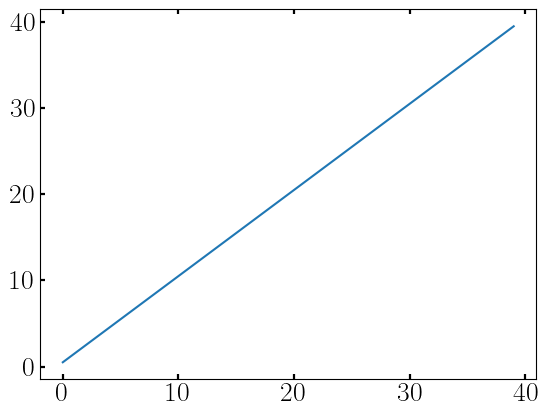

In [10]:
x = np.arange(N)
y = evals
plt.plot(x,y) #The syntax is plt.plot(x_array, y_array)

## Anharmonic Oscillator

Of course, all this was super easy to derive analytically, so the numerical analysis is trivial. However, suppose we added a  **anharmonic** quartic potential to the Hamiltonian, yielding a new Hamiltonian $H^{(a)}$, where
\begin{equation*}
H^{(a)} = \frac{p^2}{2} + \frac{x^2}{2} + \alpha x^4 = H +  \alpha x^4 = a^\dagger a + \frac{1}{2} + \alpha x^4.
\end{equation*}
Now, no *exact* analytical solution to the eigenvalue problem is possible! Nonetheless, we can use perturbation theory to get approximate solutions, provided the perturbation $\alpha\ll 1$. Let us focus only on the ground state $E_0$ of $H^{(a)}$. A detailed calculation for $E_0$ using perturbation theory was published by Carl Bender and Tai-Tsun Wu in the sixties [[*Physical Review* **185**(5), 1231, (1969)]](https://doi.org/10.1103/PhysRev.184.1231). Their result is reproduced below:
\begin{equation*}
E_0 = \frac{1}{2} + \frac{3}{4}\alpha -\frac{21}{8}\alpha^2 +\frac{333}{6}\alpha^3+ \dots.
\end{equation*}
You can see that, if the perturbation $\alpha=0$, the result yields the unperturbed energy of the ground state **i.e.** $1/2$.


Let us test this against numerical results. Recall that
\begin{align*}
a &= \frac{1}{\sqrt{2}}\left(x + ip\right),\\
a^\dagger &= \frac{1}{\sqrt{2}}\left(x - ip\right).
\end{align*}
Therefore, we can easily see that the position operator $x = \displaystyle\frac{1}{\sqrt{2}}\left(a + a^\dagger\right)$. Thus,


In [ ]:
x_op =  (a + a_dag)/np.sqrt(2)
x_op

Recalling that '$\cdot$' means matrix multiplication, we can now write $\alpha x^4 = \alpha \times \left(x \cdot x \cdot x \cdot x\right)$, and use `@` idiom in `NumPy` to perform repeated matrix multiplications. Setting $\alpha$ to a small value, say, $0.01$, we have

In [ ]:
alpha = 0.01
H = 0.5 * np.eye(N) + (a_dag @ a )
Ha = H + alpha * (x_op @ x_op @ x_op @ x_op)

# Set the precision to 2 
np.set_printoptions(precision=2)

Ha

As you can plainly see, the matrix H is no longer diagonal. Let us obtain the eigenvalues just like before, but look only at the ground state.

In [ ]:
ground_state = linalg.eigvals(Ha).min()
ground_state

Clearly, the ground state is no longer $1/2$, but a bit more than that. This is the effect of the anharmonic term. Now, let us do this for a whole range of $\alpha$ s, starting from the beginning. First, let us use the `numpy.linspace()` function to create a uniformly spaced array of $100 \alpha$ values from $0-1$.

In [ ]:
alpha_vals = np.linspace(0.0, 0.1, 100)
alpha_vals

Nest, we use a `for` loop to populate an empty list with the ground states for every value of $\alpha$ in the linespace. Starting from the very beginning, this yields

In [ ]:
N=40
a_dag = np.diag(np.sqrt(np.arange(1,N)), k=-1) #The creation operator for the unperturbed system
a = a_dag.conj().T
x_op =  (a + a_dag)/np.sqrt(2)

gstates = [] #This empty list will be populated with the ground state energies for each value of alpha

for alpha in alpha_vals:
  H = 0.5 * np.eye(N) + (a_dag @ a ) 
  Ha = H  + alpha * (x_op @ x_op @ x_op @ x_op)
  gstates.append(linalg.eigvals(Ha).min())

Let us now use `pyplot.plot()` to plot the ground state as a function of the chosen $\alpha$ values. This is easy enough, and can be done with just one line. Recall the syntax of `pyplot.plot()` as `plt.plot(x_array, y_array)`, with `pyplot` replaced by `plt` since we imported the `pyplot` module into a shorter name. Applying this function yields

In [ ]:
plt.plot(alpha_vals, gstates) 

Let us now plot the analytical result. The analytical formula of Bender and Wu, to the lowest perturbative order, was $E_0 = \frac{1}{2} + \frac{3}{4}\alpha = 0.5 + 0.75\times\alpha$. Since we have a range of $\alpha$ s inside a `NumPy` array, we can simply use **array programming** rules, apply the analytical formula to the whole array, and plot the resultant array against the array of $\alpha$ s. This yields

In [ ]:
plt.plot(alpha_vals, 0.5  + 0.75 * alpha_vals)

How well do the analytical and numerical results match? Let us plot them together. This can be done by simply calling `pyplot.plot() ` twice, once for each $(x,y)$ dataset. We will first use the lowest-order perturbative result. In order to clearly distinguish between the analytical and numerical datasets, we will tell `pyplot.plot()` to use specific colors for each dataset with the optional keyword argument `color=`. This yields

In [ ]:
plt.plot(alpha_vals, gstates, color="blue") # The numerical data will be plotted in blue
plt.plot(alpha_vals, (1/2) + (3/4) * alpha_vals, color="red") #The lowest-order analytical data will be plotted in red

The "blue" color is the numerical result, and the "red" the perturbative result. As you can plainly see, the agreement is **asymptotic**, in that they approach each other as perturbation becomes smaller. This is an important aspect of perturbation theory. It is only accurate for small perturbations unless you calculate terms to all infinity orders.

We can confirm this by comparing the first, second, and third order with the numerical result. Since we have to compare many curves, it makes sense to label each curve, then have the labels in a plot *legend*. The `pyplot.plot` function has an additional optional keyword argument called `label=` that allows for labelling each plot. The legend can be created with the `pyplot.legend()` function.

In [ ]:
plt.plot(alpha_vals, gstates, color="blue", label="Numerical") #Numerical

plt.plot(alpha_vals, (1/2) + (3/4) * alpha_vals , color="red", label="First Order") #First order

plt.plot(alpha_vals, (1/2) + (3/4) * alpha_vals - (21/8) * alpha_vals**2, color="green",
         label="Second Order") #Second order

plt.plot(alpha_vals, (1/2) + (3/4) * alpha_vals - (21/8) * alpha_vals**2 + (333/6) * alpha_vals**3,
         color="magenta", label="Third Order") #Third order

plt.legend()

#We can also add labels to the x and y axis with the pyplot.label() function
plt.xlabel("Perturbation (a)");
plt.ylabel("Ground State Energy (E0)");

As you can see, the accuracy does not necessarily improve as you go to higher orders. However, the accuracy *always* improves asymptotically for smaller perturbation.

### Exercise 03: 
In the exercise above, we chose a value of $N$ somewhat arbitrarily. We had to choose *some* value, as the real value was infinity, which was impossible to choose computationally. 

How do we decide a large enough value of $N$, and what will the effect of choosing a value of $N$ that is too small or too large? The error that arises out of a choice of finite $N$ is the **truncation error** of the problem.

Too small a choice of $N$, and you will lose the influence of higher energy states on the perturbed problem, yielding a large truncation error. 

Too large a choice, and you will redundantly add higher energy states that have no perceptible effect on the system, but will make the computation unnecessarily slow.

The relative truncation error of a size-dependent quantity $E(N)$ for a particular $N$ can be estimated by choosing a higher value of $N$, say, $N+1$ and assuming that the value of your quantity $E(N+1)$ is "exact" at the higher order. Then, the truncation error $\epsilon(N)$ for $E(N)$ can be estimated as

\begin{equation*}
\epsilon(N) \equiv \left\vert\frac{E(N)-E(N+1)}{E(N+1)}\right\vert
\end{equation*}

Set a value of $\alpha=0.5$ and look at the numerically computed ground state energy of the anharmonic oscillator for a range of values of $N$ and plot them. Estimate the truncation error and find the smallest value of $N$ beyond which it is negligible. 